<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

Sun Jun  2 10:46:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
| 49%   43C    P8              16W / 125W |    702MiB /  6144MiB |      7%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#! nvidia-smi

In [14]:
#!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#Current_dir = os.getcwd()
#Current_dir

In [19]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [21]:
base_dir = r"C:\Users\YannisPC\PycharmProjects\Thesis\Thesis\READY_BALANCED_SAME_SIZE_Random_Split"

In [22]:
data=tf.keras.utils.image_dataset_from_directory(base_dir, batch_size=32, image_size=(224,224))
#data=tf.keras.utils.image_dataset_from_directory('data_medium', batch_size=32, image_size=(150,150))

Found 34600 files belonging to 3 classes.


# Split Data

In [23]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [24]:
train_Ads_dir = os.path.join(train_dir, 'Ads')
train_sample_dir = os.path.join(train_dir, 'Sample')
train_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\train\\Ads'

In [25]:
validation_Ads_dir = os.path.join(validation_dir, 'Ads')
validation_sample_dir = os.path.join(validation_dir, 'Sample')
validation_Ads_dir


'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\validation\\Ads'

In [26]:
test_Ads_dir = os.path.join(test_dir, 'Ads')
test_sample_dir = os.path.join(test_dir, 'Sample')
test_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\test\\Ads'

In [27]:
print('total training Ads images:', len(os.listdir(train_Ads_dir)))

total training Ads images: 10500


In [28]:
print('total training sample images:', len(os.listdir(train_sample_dir)))

total training sample images: 10500


In [29]:
print('total validation Ads images:', len(os.listdir(validation_Ads_dir)))

total validation Ads images: 3650


In [30]:
print('total validation sample images:', len(os.listdir(validation_sample_dir)))

total validation sample images: 3950


In [31]:
print('total test Ads images:', len(os.listdir(test_Ads_dir)))

total test Ads images: 3000


In [32]:
print('total test sample images:', len(os.listdir(test_sample_dir)))

total test sample images: 3000


## Using data augmentation/ datagen

In [33]:
from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')


train_datagen = ImageDataGenerator(
    rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=32, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 7600 images belonging to 2 classes.


## Pretrained Model Inception

In [34]:
import keras
from keras.models import load_model


# Appling a Pre-trained CNN on our Dataset for comparison

The Inception model
https://www.researchgate.net/figure/Inception-V3-pre-trained-neural-network-architecture-26-VGG-16-VGG-16-is-a-convolutional_fig2_344579619



In [35]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [36]:
conv_base.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

We will add a dense layer after our conv_base NN

In [37]:
from keras import models
from keras import layers

modelPreTInc = models.Sequential()
modelPreTInc.add(conv_base)

modelPreTInc.add(layers.Flatten())
modelPreTInc.add(layers.Dense(256, activation='relu'))
modelPreTInc.add(layers.Dropout(0.5))
modelPreTInc.add(layers.Dense(1, activation='sigmoid'))

In [38]:
modelPreTInc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,910,497
Trainable params: 34,876,065
Non-trainable params: 34,432
_________________________________________________________________


Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the ResNet50

In [39]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreTInc.trainable_weights))

This is the number of trainable weights before freezing the conv base: 192


In [40]:
conv_base.trainable = False

In [41]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreTInc.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [42]:
modelPreTInc.compile('Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])# Adagrad, adam

In [60]:
modelPreTInc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,910,497
Trainable params: 13,107,713
Non-trainable params: 21,802,784
_________________________________________________________________


In [44]:
histPreT = modelPreTInc.fit(train_generator, epochs=30, validation_data=validation_generator) #  epochs 10 are over fitting. early stop at?

Epoch 1/30
657/657 [==============================] - 79s 111ms/step - loss: 0.3798 - accuracy: 0.8371 - val_loss: 0.3129 - val_accuracy: 0.8693
Epoch 2/30
657/657 [==============================] - 71s 108ms/step - loss: 0.2914 - accuracy: 0.8819 - val_loss: 0.2972 - val_accuracy: 0.8741
Epoch 3/30
657/657 [==============================] - 72s 110ms/step - loss: 0.2482 - accuracy: 0.9006 - val_loss: 0.2919 - val_accuracy: 0.8791
Epoch 4/30
657/657 [==============================] - 72s 109ms/step - loss: 0.2190 - accuracy: 0.9155 - val_loss: 0.2877 - val_accuracy: 0.8804
Epoch 5/30
657/657 [==============================] - 71s 109ms/step - loss: 0.1921 - accuracy: 0.9275 - val_loss: 0.2912 - val_accuracy: 0.8796
Epoch 6/30
657/657 [==============================] - 70s 107ms/step - loss: 0.1681 - accuracy: 0.9380 - val_loss: 0.2879 - val_accuracy: 0.8829
Epoch 7/30
657/657 [==============================] - 70s 106ms/step - loss: 0.1522 - accuracy: 0.9466 - val_loss: 0.2852 - val_ac

In [45]:
modelPreTInc.save(os.path.join('models/Latest','Pretrained_Inception_ad_class_no_Aug.h5'))

In [46]:
START_PLOT_FROM_EPOCH= 1

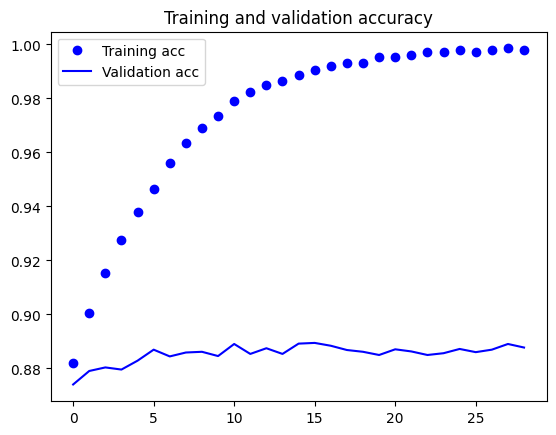

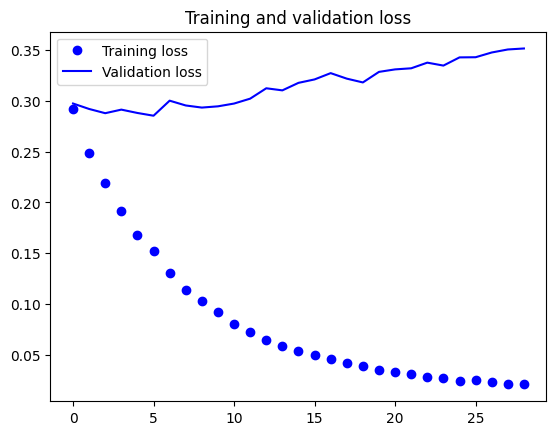

In [47]:
acc = histPreT.history['accuracy'][START_PLOT_FROM_EPOCH:]
val_acc = histPreT.history['val_accuracy'][START_PLOT_FROM_EPOCH:]
loss = histPreT.history['loss'][START_PLOT_FROM_EPOCH:]
val_loss = histPreT.history['val_loss'][START_PLOT_FROM_EPOCH:]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
val_acc_per_epoch = histPreT.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 17


## Evaluate

In [49]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_loss, test_acc = modelPreTInc.evaluate(test_generator, steps=len(test_generator))  # steps_per_epoch * epochs
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 6000 images belonging to 2 classes.
188/188 [==============================] - 15s 80ms/step - loss: 0.3335 - accuracy: 0.8895
test acc: 0.8895000219345093
test loss: 0.3335285782814026


confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to collect true labels and predictions
true_labels = []
predicted_labels = []

In [51]:
for _ in range(len(test_generator)):
    X, y = next(test_generator)

    yhat = modelPreTInc.predict(X)
    
    y_true_batch = y # Labels
    
    # Convert probabilities to class labels using a threshold of 0.5
    y_pred_batch = (yhat > 0.5).astype(int)

    # Append the true labels and predictions for this batch to the lists
    true_labels.extend(y_true_batch)
    predicted_labels.extend(y_pred_batch)

    if len(true_labels) >= test_generator.n:
        break

1/1 [==============================] - 1s 932ms/step


In [52]:
# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

In [53]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

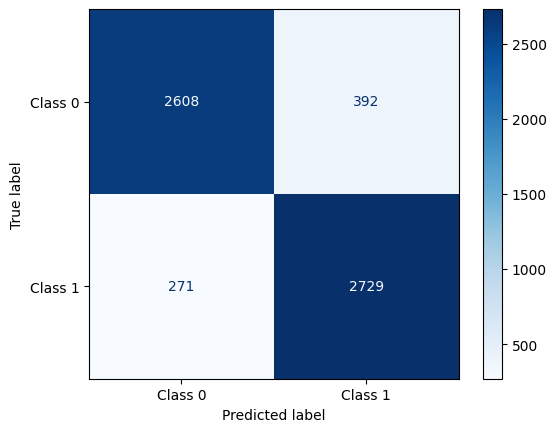

In [57]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()